Image loaded successfully.
Color image detected. Converting to grayscale...


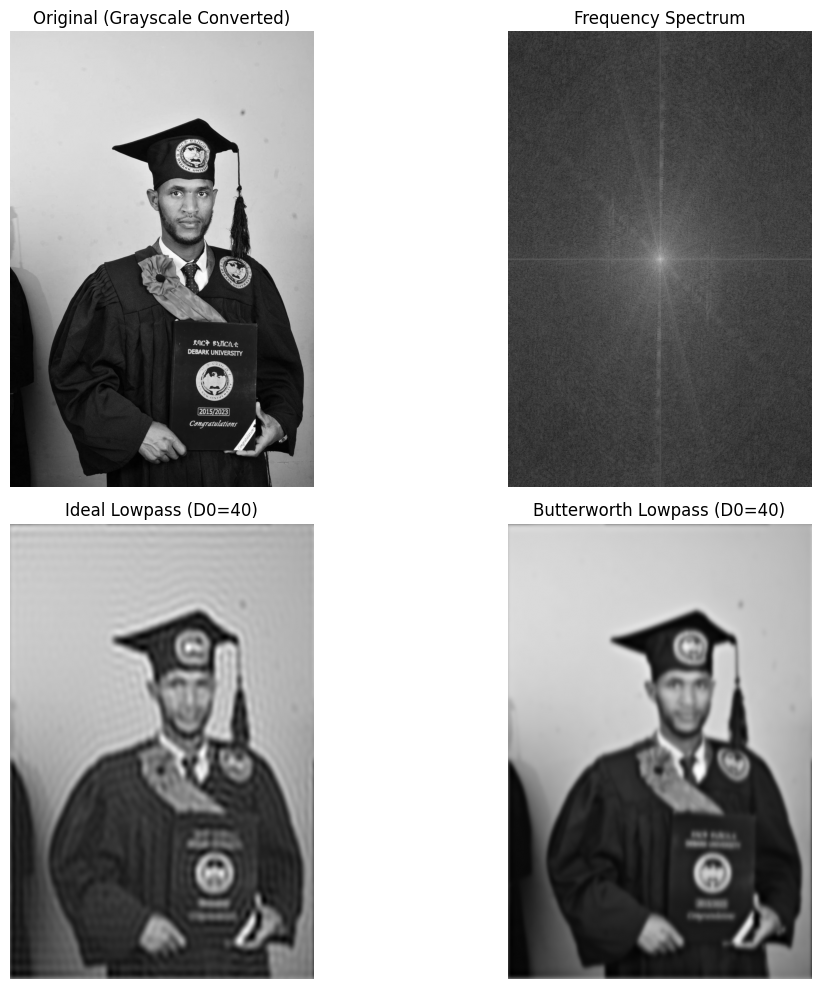

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color # 'io' is used to read files

# --- 1. READ IMAGE FROM DEVICE ---
filename = 'images.jpeg'
#filename = 'imag.jpeg'
try:
    img = io.imread(filename)
    print("Image loaded successfully.")
except FileNotFoundError:
    print(f"ERROR: Could not find the file '{filename}'.")
    print("Please make sure the image is in the correct folder.")
    # We will stop the code here if no image is found
    raise

# --- 2. CONVERT TO GRAYSCALE ---
# Check if the image has 3 color channels (RGB)
if img.ndim == 3:
    print("Color image detected. Converting to grayscale...")
    img = color.rgb2gray(img)
else:
    print("Image is already grayscale.")

# Note: The image is now a matrix of floats between 0 and 1
rows, cols = img.shape

# --- 3. COMPUTE FOURIER TRANSFORM (DFT) ---
F = np.fft.fft2(img)
F_shifted = np.fft.fftshift(F)

# --- 4. CREATE DISTANCE MATRIX D(u,v) ---
crow, ccol = rows // 2, cols // 2
x = np.linspace(-ccol, ccol, cols)
y = np.linspace(-crow, crow, rows)
X, Y = np.meshgrid(x, y)
D = np.sqrt(X**2 + Y**2)

# --- 5. CREATE FILTERS ---
D0 = 40  # Cutoff Frequency
n = 2    # Butterworth order

# A. Ideal Lowpass Filter
H_ideal = np.zeros((rows, cols))
H_ideal[D <= D0] = 1

# B. Butterworth Lowpass Filter
H_butter = 1 / (1 + (D / D0)**(2 * n))

# --- 6. APPLY FILTERS ---
G_ideal_shifted = F_shifted * H_ideal
G_butter_shifted = F_shifted * H_butter

# --- 7. INVERSE FFT (RECONSTRUCTION) ---
G_ideal = np.fft.ifftshift(G_ideal_shifted)
g_ideal = np.real(np.fft.ifft2(G_ideal))

G_butter = np.fft.ifftshift(G_butter_shifted)
g_butter = np.real(np.fft.ifft2(G_butter))

# --- 8. DISPLAY RESULTS ---
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original (Grayscale Converted)')
plt.axis('off')

plt.subplot(2, 2, 2)
# Use Log scale to see the spectrum clearly
plt.imshow(np.log(1 + np.abs(F_shifted)), cmap='gray')
plt.title('Frequency Spectrum')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(g_ideal, cmap='gray')
plt.title(f'Ideal Lowpass (D0={D0})')
plt.xlabel('Note: Ringing artifacts')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(g_butter, cmap='gray')
plt.title(f'Butterworth Lowpass (D0={D0})')
plt.xlabel('Note: Smoother edges')
plt.axis('off')

plt.tight_layout()
plt.show()